In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
X_train[2].shape

(32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (12,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

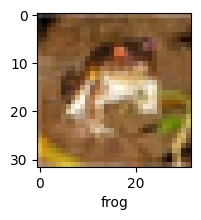

In [ ]:

plot_sample(X_train,y_train,0)

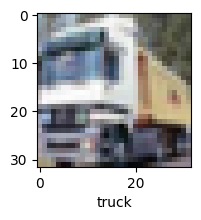

In [ ]:
plot_sample(X_train,y_train,1)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(100,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid'),

])

In [ ]:
ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [ ]:
ann.fit(X_train,y_train,epochs = 5)

Epoch 1/5
 565/1563 [=========>....................] - ETA: 4s - loss: 2.0272 - accuracy: 0.2645

In [ ]:
ann.evaluate(X_test,y_test)

In [ ]:
cnn = models.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='softmax'),

])

In [ ]:
cnn.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [ ]:
cnn.fit(X_train,y_train,epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 47s 29ms/step - loss: 2.0012 - accuracy: 0.2738
Epoch 2/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.6314 - accuracy: 0.4175
Epoch 3/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4653 - accuracy: 0.4766
Epoch 4/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.3691 - accuracy: 0.5117
Epoch 5/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.2928 - accuracy: 0.5419
Epoch 6/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.2329 - accuracy: 0.5655
Epoch 7/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1792 - accuracy: 0.5843
Epoch 8/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1342 - accuracy: 0.6032
Epoch 9/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.0915 - accuracy: 0.6181
Epoch 10/15
1563/1563 [==============================] - 48s 31m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0417 - accuracy: 0.6407


[1.0417295694351196, 0.6406999826431274]

In [ ]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [ ]:
np.argmax([y_pred[0]])

3

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
y_pred[0:5].shape

(5, 10)

In [ ]:
a = [np.argmax(i) for i in y_pred[10:15]]

In [ ]:
a

[0, 9, 5, 7, 9]

In [ ]:
y_test[10:15]

array([[0],
       [9],
       [5],
       [7],
       [9]], dtype=uint8)

In [ ]:
classes[a[0]]

'airplane'

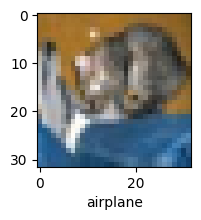

In [ ]:
plot_sample(X_test,a,0)

Text(0.5, 0, 'airplane')

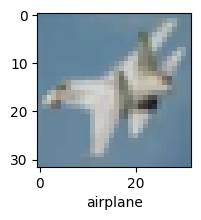

In [ ]:
plt.figure(figsize = (12,2))
plt.imshow(X_test[10])
plt.xlabel(classes[a[0]])